## Delivery (INTER-Day) Strategy v0.1
#### @05-09-2023

## Level-01

#### Pre-req - 
    1.  a.) Use DF rows at or after first 40 mins
        b.) loop for all >40 every minute for stocks

#### Process Steps:
    2. Aroon > 80 && have touched 100 in last 10 mins
        2.a. If Yes - eligible for trade && move to the next step
    3. MACD > 0 && MACD > macd-signal
    4. ADX 
        ADX above 20 and DI+ above DI-: That's an uptrend.
        ADX above 20 and DI- above DI+: That's a downtrend.
        ADX below 20 is a weak trend or ranging period
    5. RSI > 70 && moving downward - Sell signal
        Else if RSI < 30 && moving upward after getting below 30  -> Buy signal
    6. STO < 20 and trending upward -> Buy
          Else if STO > 80 and trending downward -> short sell
    7. OBV following trend - confirmation to go along
          else if diverging - trend reversal expected
    8. A/D - if going up - Buy
        8.a elseif going down - sell
        elseif diverging - trend reversal   
        
# Level-02
    1. Get signal based on TA values
    2. Review back-testing results
    3. Fine-tune - iterative process
    4. Finalize.
  


In [19]:
# imports
import pandas as pd
import pandas_datareader.data as pdr
import talib as ta
import yfinance as yf
import csv

from talib.abstract import *
# from talib import MA_Type
from datetime import datetime

import matplotlib.pyplot as plt 
plt.style.use('bmh')


In [20]:
# # Get today's date in yyyy-mm-dd format
# today_date = datetime.today().strftime('%Y%m%d')
# # today_date = '20230728'

# tickerStrings = ['SBIN.NS']         # , 'MSFT'], GRASIM.NS, SBIN.NS
# tickerfile = '';
# for ticker in tickerStrings:
#     data = yf.download(ticker, group_by="Ticker", period="1d", interval="1m")
#     data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
#     data.to_csv(f'ticker_{ticker}_{today_date}.csv')  # ticker_AAPL_yyyymmss.csv for example
#     tickerfile = 'ticker'+ '_' + ticker + '_' + today_date + ".csv"
# #     print('ticker'+ '_' + ticker + '_' + today_date + ".csv")
#     print(tickerfile)
    
# aapl = pd.read_csv(tickerfile)
# aapl

In [21]:
# Get today's date in yyyy-mm-dd format
today_date = datetime.today().strftime('%Y%m%d')
# today_date = '20230728'

tickerStrings = ['SBIN.NS', 'MSFT']         # , 'MSFT'], GRASIM.NS, SBIN.NS
tickerfile = '';
for ticker in tickerStrings:
    data = yf.download(ticker, group_by="Ticker", period="1y", interval="1d")
    data['ticker'] = ticker  # add this column because the dataframe doesn't contain a column with the ticker
    data.to_csv(f'ticker_{ticker}_{today_date}.csv')  # ticker_AAPL_yyyymmss.csv for example
    tickerfile = 'ticker'+ '_' + ticker + '_' + today_date + ".csv"
#     print('ticker'+ '_' + ticker + '_' + today_date + ".csv")
    print(tickerfile)
    
aapl = pd.read_csv(tickerfile)
aapl

[*********************100%%**********************]  1 of 1 completed
ticker_SBIN.NS_20230913.csv
[*********************100%%**********************]  1 of 1 completed
ticker_MSFT_20230913.csv


,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-09-13,258.839996,260.399994,251.589996,251.990005,249.578873,33353300,MSFT
1,2022-09-14,253.529999,254.229996,249.860001,252.220001,249.806656,23913000,MSFT
2,2022-09-15,249.770004,251.399994,244.020004,245.380005,243.032120,31530900,MSFT
3,2022-09-16,244.259995,245.300003,242.059998,244.740005,242.398239,39791800,MSFT
4,2022-09-19,242.470001,245.139999,240.850006,244.520004,242.180344,26826900,MSFT
...,...,...,...,...,...,...,...,...
246,2023-09-06,333.380005,334.459991,330.179993,332.880005,332.880005,17535800,MSFT
247,2023-09-07,331.290009,333.079987,329.029999,329.910004,329.910004,18381000,MSFT
248,2023-09-08,330.089996,336.160004,329.459991,334.269989,334.269989,19530100,MSFT
249,2023-09-11,337.239990,338.420013,335.429993,337.940002,337.940002,16583300,MSFT


In [22]:
# use CSV from system
# aapl = pd.read_csv('SBIN.csv')
aapl = pd.read_csv('ticker_SBIN.NS_20230905.csv')
# aapl = pd.read_csv(tickerfile)
# len(aapl)
aapl

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
0,2022-09-05,537.000000,540.799988,536.299988,538.900024,528.627441,7819994,SBIN.NS
1,2022-09-06,538.000000,542.700012,534.099976,537.799988,527.548401,8657868,SBIN.NS
2,2022-09-07,534.400024,537.450012,531.549988,532.849976,522.692749,8445359,SBIN.NS
3,2022-09-08,536.000000,546.299988,535.500000,544.650024,534.267822,12240707,SBIN.NS
4,2022-09-09,549.650024,557.000000,548.000000,553.349976,542.801941,18587927,SBIN.NS
...,...,...,...,...,...,...,...,...
245,2023-08-30,576.700012,577.700012,566.099976,567.400024,567.400024,15281416,SBIN.NS
246,2023-08-31,569.299988,570.299988,559.400024,561.349976,561.349976,27898476,SBIN.NS
247,2023-09-01,562.700012,571.200012,562.099976,569.549988,569.549988,18121168,SBIN.NS
248,2023-09-04,572.000000,576.349976,568.450012,575.549988,575.549988,12108655,SBIN.NS


In [23]:
# len(aapl)
# print(aapl.duplicated())

In [24]:
# Making hr_mins as index
# aapl['hr_mins'] = aapl['Datetime'][11:13] + aapl['Datetime'][14:16]

# for i in range(len(aapl)):
#     aapl['hr_mins'][i] = aapl['Datetime'][i][11:13] + aapl['Datetime'][i][14:16]
    
# aapl.set_index('hr_mins', inplace=True)


In [25]:
aapl.tail()

,Date,Open,High,Low,Close,Adj Close,Volume,ticker
245,2023-08-30,576.700012,577.700012,566.099976,567.400024,567.400024,15281416,SBIN.NS
246,2023-08-31,569.299988,570.299988,559.400024,561.349976,561.349976,27898476,SBIN.NS
247,2023-09-01,562.700012,571.200012,562.099976,569.549988,569.549988,18121168,SBIN.NS
248,2023-09-04,572.000000,576.349976,568.450012,575.549988,575.549988,12108655,SBIN.NS
249,2023-09-05,575.599976,578.200012,575.599976,578.000000,578.000000,1344128,SBIN.NS


### Step 1 - Pre-requisites
    a.) Use DF rows at or after first 40 mins
    b.) Update DF with required columns

In [26]:
# aapl2 = aapl
# aapl = aapl[0:40]

In [27]:
# Add All indicator columns

# OBV - On Balance Volume
aapl['OBV'] = OBV(aapl['Close'], aapl['Volume'])

# Accumulation and Distribution line - Chaikin A/D Line
aapl['AD'] = AD(aapl['High'], aapl['Low'], aapl['Close'], aapl['Volume'])

# AROON Indicator
aapl['aroondown'], aapl['aroonup'] = AROON(aapl['High'], aapl['Low'], timeperiod=14)

# MACD
aapl['macd'], aapl['macdsignal'], aapl['macdhist'] = MACD(aapl['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

# ADX Indicator
aapl['adx']  = ADX(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)
aapl['PLUS_DI'] = PLUS_DI(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)
aapl['MINUS_DI'] = MINUS_DI(aapl['High'], aapl['Low'], aapl['Close'], timeperiod=14)

# RSI
aapl['RSI'] = ta.RSI(aapl['Close'],14) 

# Stochastic
aapl['slowk'], aapl['slowd'] = ta.STOCH(aapl['High'], aapl['Low'], aapl['Close'], fastk_period=14, slowk_period=3, 
                                        slowk_matype=0, slowd_period=3, slowd_matype=0)




## Combined Run 02:
####    @05-09-2023

In [28]:
# Approach: 02 - Make all the three indicator groups independent

# Trend Indicator
aroon = 0
arup = 0
macd = 0
macdval = 0
macdsignal = 0
adx = 0
plusdi = 0
minusdi = 0

# Momentum
rsi = 0
stoch = 0

# Volume
adv = 0
obv = 0

# index range
start = 0
end = len(aapl)

# result csv
csv_header = ['Datetime', 'OBV', 'A/D', 'Aroon', 'MACD', 'ADX', 'RSI', 'RSI01', 'RSI02', 'Stoch']
ticker_signal_csv = ticker + '_' + 'signal' + '_' + today_date + '.csv'

with open(ticker_signal_csv, 'w', encoding='UTF8', newline='') as f:
    writer = csv.writer(f)
    writer.writerow(csv_header)
# result csv ends              

for i in range (start, end):
    
# Checking for Volume indicators
    # OBV
    price_trend = 0  # used by OBV as well as A/D
    obv_trend = 0
    adv_trend = 0
    
    
    if((aapl.iloc[i-10]['Close']) != 0):    
        price_trend = (aapl.iloc[i]['Close'] - aapl.iloc[i-10]['Close'])/(aapl.iloc[i-10]['Close'])
    
    if((aapl.iloc[i-10]['OBV']) != 0):
        obv_trend = (aapl.iloc[i]['OBV'] - aapl.iloc[i-10]['OBV'])/(aapl.iloc[i-10]['OBV'])

    if((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 1
    elif((aapl.iloc[i]['OBV'] > aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((aapl.iloc[i]['OBV'] < aapl.iloc[i-5]['OBV']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        obv = 36
    elif((price_trend > 1.4*obv_trend) or (1.4*price_trend < obv_trend)):
        obv = 36
    else:
        obv = 0
    
    # A/D
    # -----
    if((aapl.iloc[i-10]['AD']) != 0):
        ad_trend = (aapl.iloc[i]['AD'] - aapl.iloc[i-10]['AD'])/(aapl.iloc[i-10]['AD'])

    if((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 1
    elif((aapl.iloc[i]['AD'] > aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] < aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((aapl.iloc[i]['AD'] < aapl.iloc[i-5]['AD']) and (aapl.iloc[i]['Close'] > aapl.iloc[i-5]['Close'])):
        adv = 36
    elif((price_trend > 1.4*ad_trend) or (1.4*price_trend < ad_trend)):
        adv = 36
    else:
        adv = 0
    
#  Checking for momentum indicators
    # Aroon Setup
    ar100 = 'N'
    arup = aapl.iloc[i]['aroonup']
    aroon = 0

    for n in range(i-10,i):
        if(aapl.iloc[n]['aroonup'] == 100):
            ar100 = 'Y'
    if((arup > 80) and (ar100 == "Y") ):
        aroon = 1 
    
    # MACD
    macd = 0
    macdval = aapl.iloc[i]['macd']
    macdsignal = aapl.iloc[i]['macdsignal']

    if((macdval >0) and (macdval > macdsignal)):
        macd = 1
        
    # ADX
    adx = 0

    adxval = aapl.iloc[i]['adx']
    plusdi = aapl.iloc[i]['PLUS_DI']
    minusdi = aapl.iloc[i]['MINUS_DI']

    if((adxval >= 20) and (plusdi > minusdi)):
        adx = 1
    elif((adxval >= 20) and (plusdi < minusdi)):
        adx = -1
    else:
        adx = 0
    
    ####  Checking for momentum indicators
    # RSI
    if((aapl.iloc[i]['RSI'] > 70) and (aapl.iloc[i]['RSI'] < aapl.iloc[i-1]['RSI'])):
        rsi = -1
    elif((aapl.iloc[i]['RSI'] < 30) and (aapl.iloc[i]['RSI'] > aapl.iloc[i-1]['RSI'])):
        rsi = 1
    else:
        rsi = 0

    # STO - slowk, slowd
    if((aapl.iloc[i]['slowk'] > 80) and (aapl.iloc[i]['slowk'] < aapl.iloc[i]['slowd'])):
        stoch = -1
    elif((aapl.iloc[i]['slowk'] < 30) and (aapl.iloc[i]['slowk'] > aapl.iloc[i]['slowd'])):
        stoch = 1
    else:
        stoch = 0
        
    
    
    
        
# Final status
    if((obv ==1) and (adv==1) and (aroon==1) and (macd >0) and (adx >0) ):
        
        print(aapl.iloc[i]['Date'], " OBV:", obv, " A/D:", adv
          ," Aroon:", aroon, " MACD:", macd, " ADX:", adx
          ," RSI:", rsi, " ", aapl.iloc[i]['RSI'], " ", aapl.iloc[i-1]['RSI'] 
          , " Stoch:", stoch)
        data = [aapl.iloc[i]['Date'], obv, adv, aroon, macd, adx, rsi, aapl.iloc[i]['RSI'], aapl.iloc[i-1]['RSI'], stoch]
        
        # write results to file
        with open(ticker_signal_csv, 'a', encoding='UTF8', newline='') as f:
            writer = csv.writer(f)
            writer.writerow(data)
        
#         print(aapl.iloc[i])
#         print(aapl.loc[aapl['Datetime'] == aapl.iloc[i]['Datetime']])
        

2022-10-27  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   66.74488215689175   66.3900332425467  Stoch: 0
2022-11-03  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   65.79037617802443   61.41990999717787  Stoch: 0
2022-11-04  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   68.8979536956196   65.79037617802443  Stoch: 0
2022-11-07  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   74.4720865215093   68.8979536956196  Stoch: 0
2022-11-09  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   74.80904983889334   74.4720865215093  Stoch: -1
2022-11-10  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   68.03861853671978   74.80904983889334  Stoch: -1
2023-04-25  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   66.60472973498818   63.379855749745005  Stoch: 0
2023-04-26  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   68.49298883829076   66.60472973498818  Stoch: 0
2023-04-27  OBV: 1  A/D: 1  Aroon: 1  MACD: 1  ADX: 1  RSI: 0   67.05713761165313   68.49298883829076  Sto

In [29]:
# check summary status:

# aapl.tail()
# aapl.loc[aapl['Datetime'] == '2023-07-14 12:21:00+05:30']
df = pd.read_csv(ticker_signal_csv)

print(df.to_string()) 

      Datetime  OBV  A/D  Aroon  MACD  ADX  RSI      RSI01      RSI02  Stoch
0   2022-10-27    1    1      1     1    1    0  66.744882  66.390033      0
1   2022-11-03    1    1      1     1    1    0  65.790376  61.419910      0
2   2022-11-04    1    1      1     1    1    0  68.897954  65.790376      0
3   2022-11-07    1    1      1     1    1    0  74.472087  68.897954      0
4   2022-11-09    1    1      1     1    1    0  74.809050  74.472087     -1
5   2022-11-10    1    1      1     1    1    0  68.038619  74.809050     -1
6   2023-04-25    1    1      1     1    1    0  66.604730  63.379856      0
7   2023-04-26    1    1      1     1    1    0  68.492989  66.604730      0
8   2023-04-27    1    1      1     1    1    0  67.057138  68.492989      0
9   2023-04-28    1    1      1     1    1    0  72.344663  67.057138      0
10  2023-05-02    1    1      1     1    1    0  69.678085  72.344663     -1
11  2023-05-16    1    1      1     1    1    0  67.238643  65.167981      0

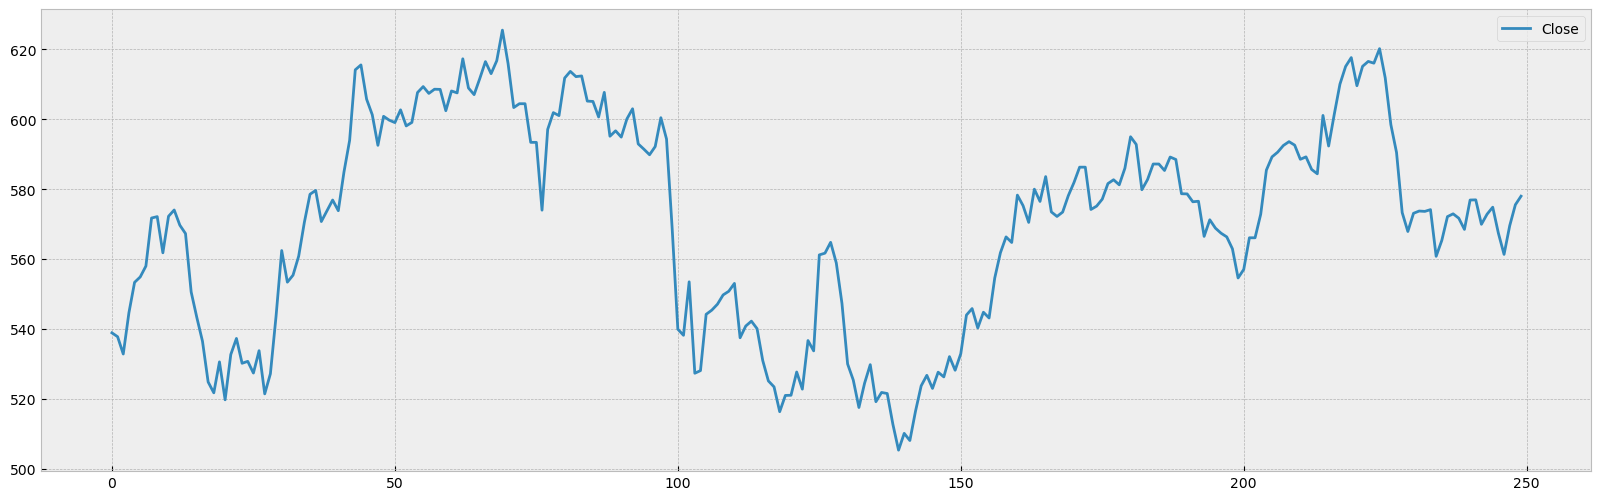

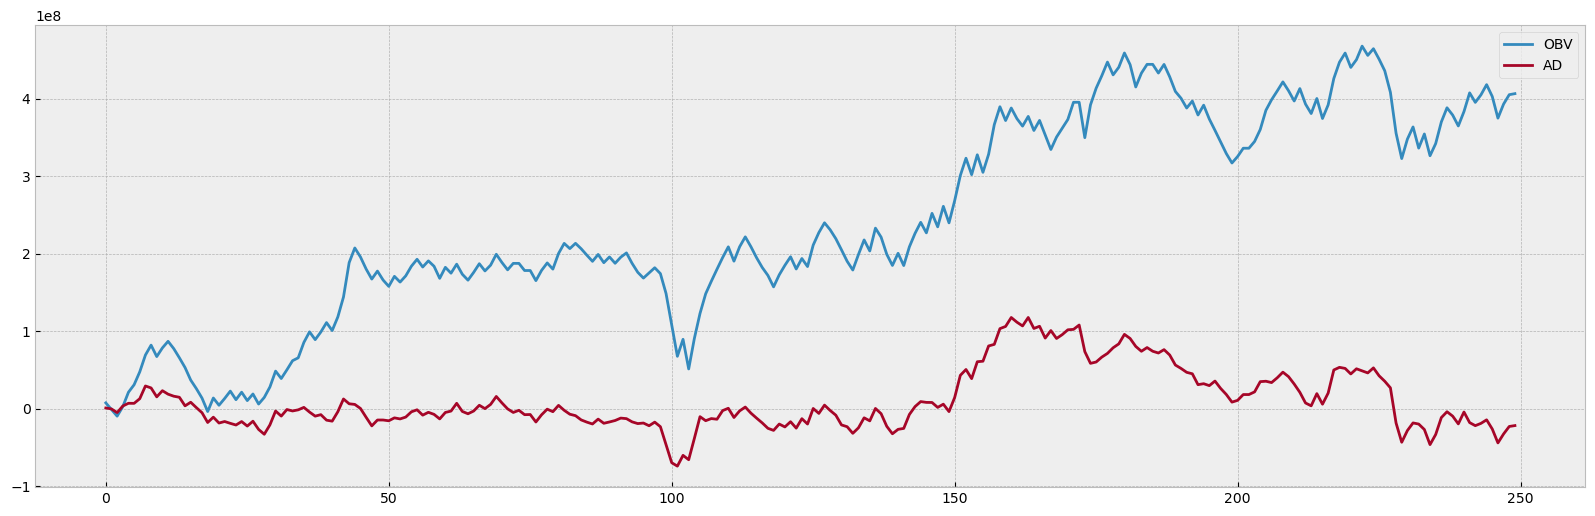

In [30]:
aapl[['Close']].plot(figsize=(20,6))
aapl[['OBV', 'AD']].plot(figsize=(20,6))
# aapl[['AD']].plot(figsize=(20,6)) 

plt.show()

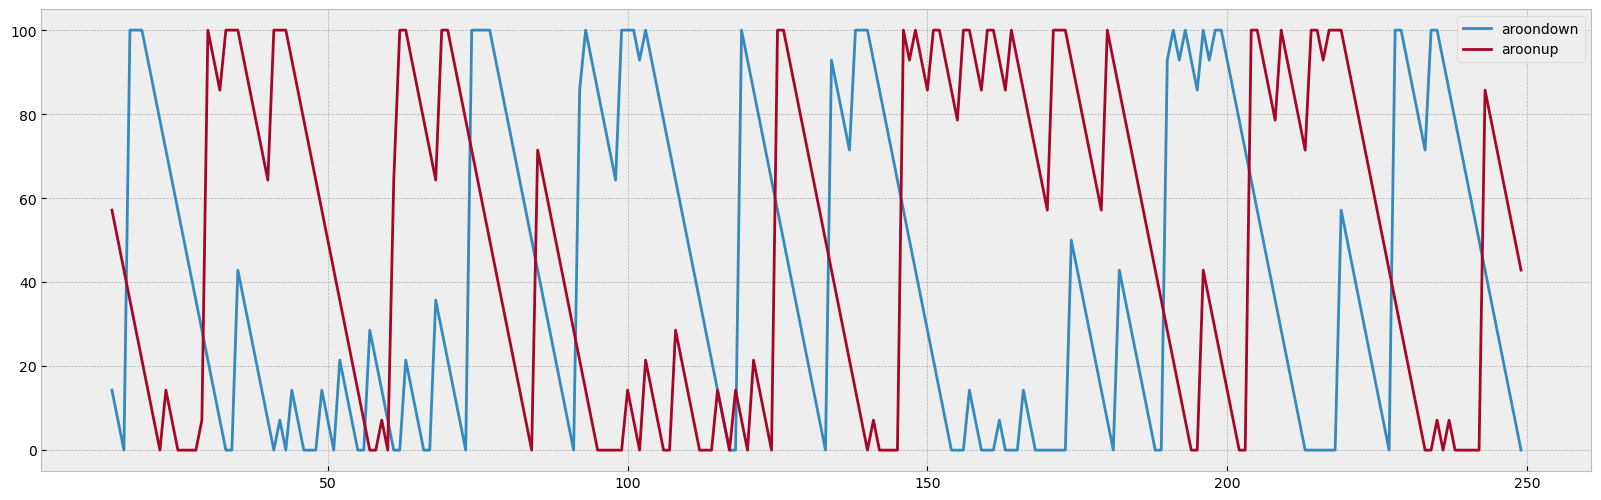

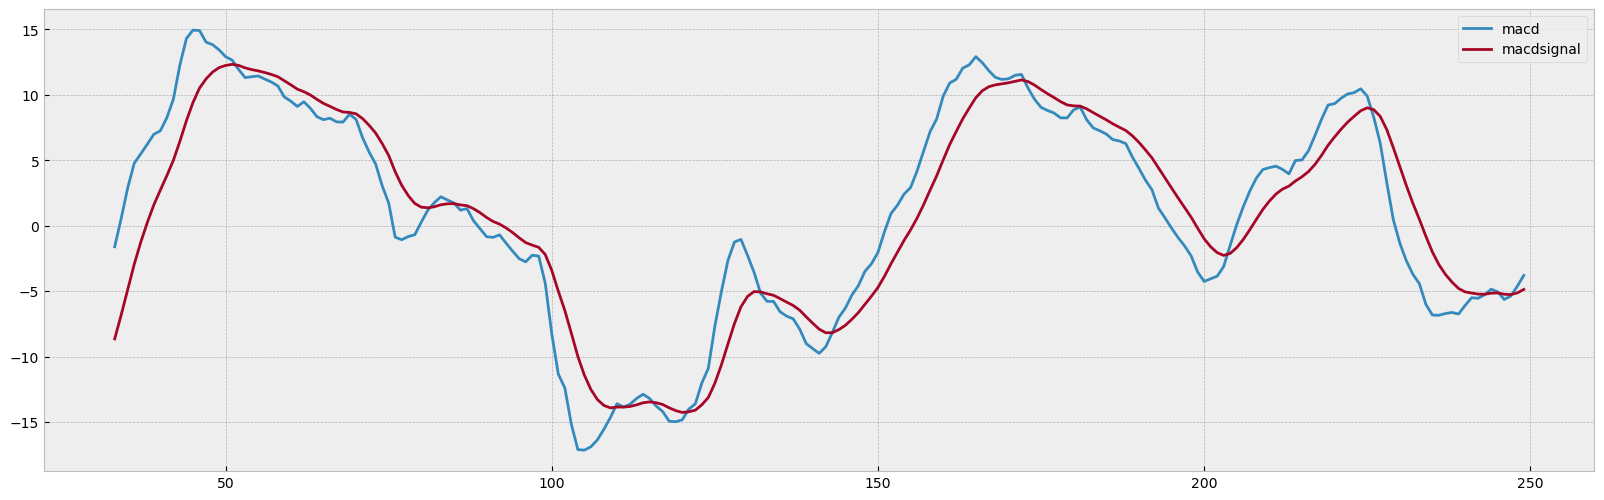

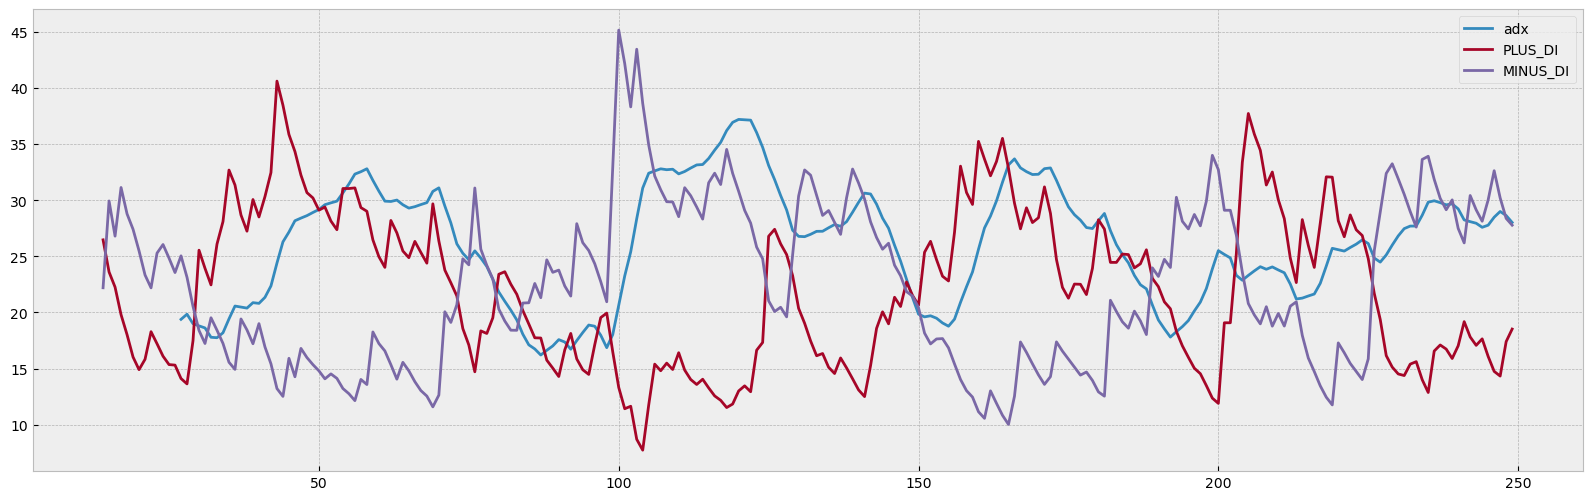

In [31]:
aapl[['aroondown','aroonup']].plot(figsize=(20,6))
aapl[['macd', 'macdsignal']].plot(figsize=(20,6)) 
aapl[['adx', 'PLUS_DI', 'MINUS_DI' ]].plot(figsize=(20,6)) 
# aapl['RSI'].plot(figsize=(12,6)) 
# aapl[['slowk','slowd']].plot(figsize=(12,6))
# aapl[['OBV']].plot(figsize=(16,6))
# aapl[['AD']].plot(figsize=(16,6)) 
 
plt.show()

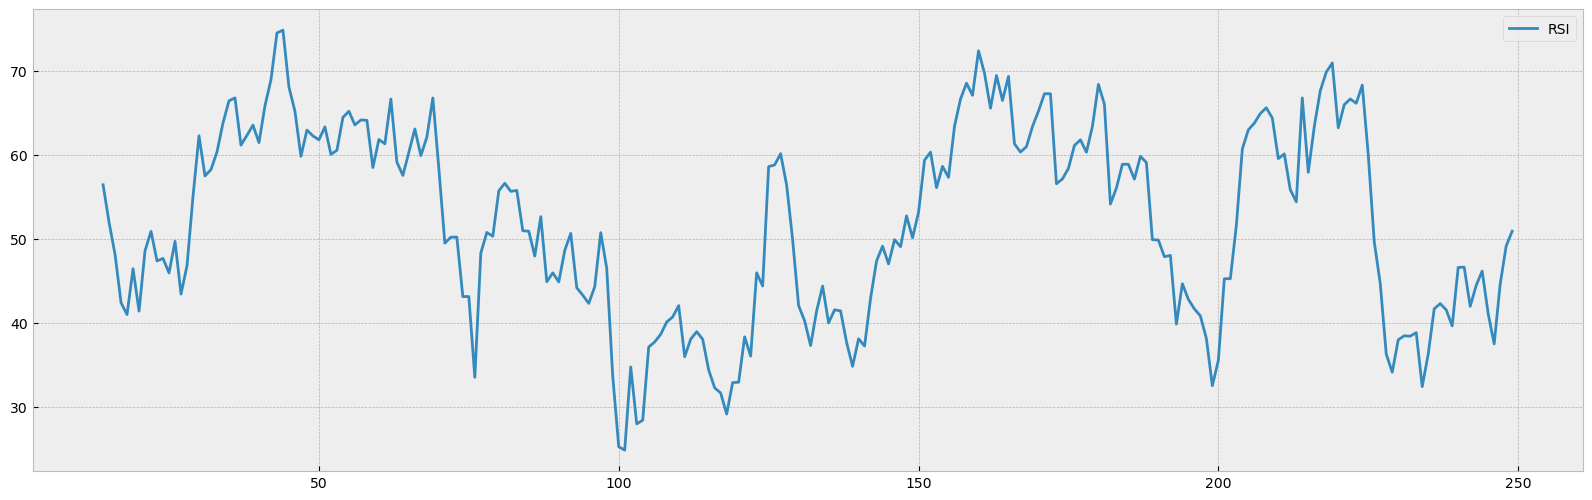

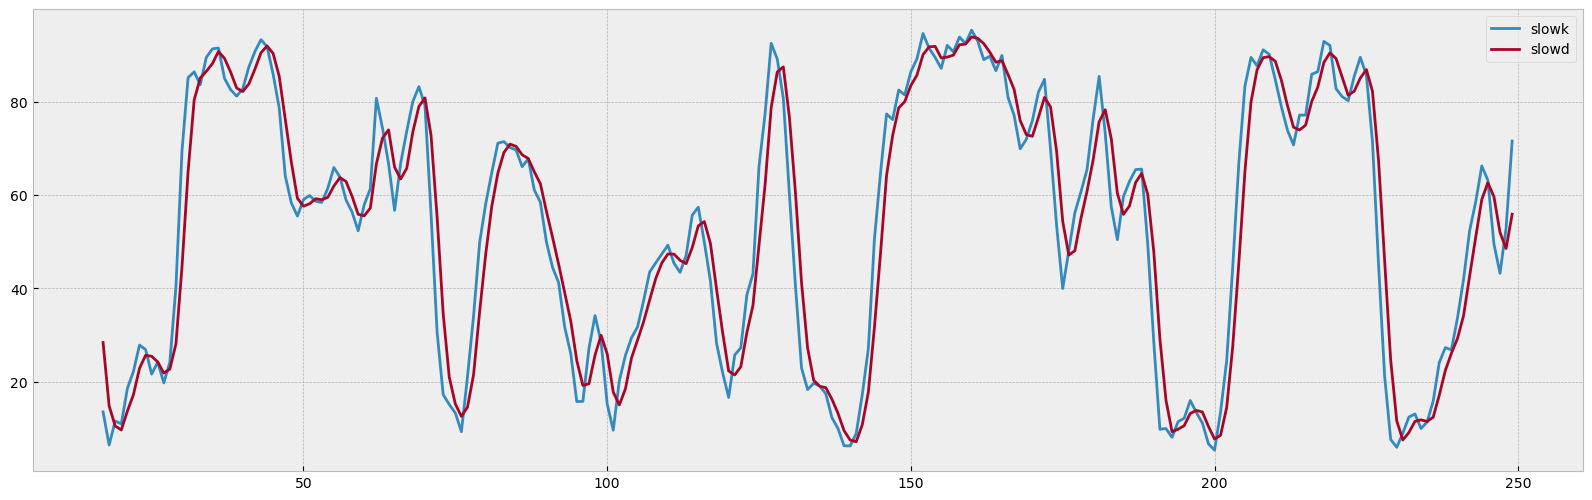

In [32]:
aapl[['RSI']].plot(figsize=(20,6)) 
aapl[['slowk','slowd']].plot(figsize=(20,6))   #STO - slowk, slowd
# aapl[['Close']].plot(figsize=(20,6))
plt.show()

In [33]:
# Row details based on Column values 
# df.loc[df['column_name'] == some_value]
# aapl.loc[aapl['Datetime'] == '2023-07-14 11:34:00+05:30']

# aapl.iloc[i]
# Index based
# aapl.iloc[[139]]

In [34]:
# aapl

In [35]:
# print(aapl['ticker'][0])

# print(ticker + '_' + 'signal' + '_' + today_date + ".csv")

# Next Step
    1. Alerts for each required instances
    2. Go with flow